# Title: MA5 - Tree Practice
# Author: Seunghyun Cho
# Date: Mar 4th, 2023

# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Srini Badri](https://school.eecs.wsu.edu/people/faculty/), [Gina Sprint](http://eecs.wsu.edu/~gsprint/)

## MA5 Tree Practice (50 pts)
<mark>Due:</mark>

### Learner Objectives
At the conclusion of this micro assignment, participants should be able to:
* Implement/analyze trees
    * Binary trees
    * Binary search trees

### Prerequisites
Before starting this micro assignment, participants should be able to:
* Write object oriented Python code
* Write Markdown and code cells in Jupyter Notebook
* Perform algorithm analysis

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* [Data Structures: Abstraction and Design Using Java](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP001607.html) by Koffman and Wolfgang

## Overview and Requirements
For this micro assignment, you are going to download this Jupyter Notebook and answer the following questions. Your answer for a problem should be in a cell *immediately* after the problem cell. *Do not modify the problem cell.*

We are going to solve several problems related to trees and their efficiency. This micro assignment includes conceptional questions and programming.

### Conceptual Questions (35 pts)
Solve the following problems and *justify* your answers:

1. For the following binary tree:
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/figures/ma5_tree.png" width="400"/>

    1. (2 pts) Is the tree full?  
    1. (2 pts) Is the tree complete? 
    1. (2 pts) What is the tree's height? 
    1. List the nodes in the tree in the order they would be visited during a: 
        1. (4 pts) Pre-order traversal
        1. (4 pts) Level-order traversal
        1. (4 pts) Post-order traversal
        1. (4 pts) In-order traversal

### Answer
A. Yes, except the leaf nodes, all have 2 children nodes.

B. Yes, except for the deepest level, every level is filled and for the deepest level, it is filled from the left.

C. 3, the deepest node's level is 3

D-a. *, A, 1, X, Y, 2, B, 3, 4

D-b. *, A, B, 1, 2, 3, 4, X, Y

D-c. X, Y, 1, 2, A, 3, 4, B, *

D-d. X, 1, Y, A, 2, *, 3, B, 4

2. (2 pts) What is the time complexity to search a full BST?

### Answer
O(log2(n))
Break the data set in half and keep calling the function recursively until it finds the data.

3. The following questions refer to the same BST. The operations are cumulative:
    1. (2 pts) Show the BST that would result from inserting the items 35, 20, 30, 50, 45, 60, 18, 25 in this sequence.
    1. (2 pts) Show the BST that would result after removing item 35 (promote in order successor).
    1. (2 pts) Show the BST that would result after removing item 18 (promote in order successor).
    1. (2 pts) How would the trees in the previous problems look differently if we promote in order predecessors instead of successors?

### Answer
A. 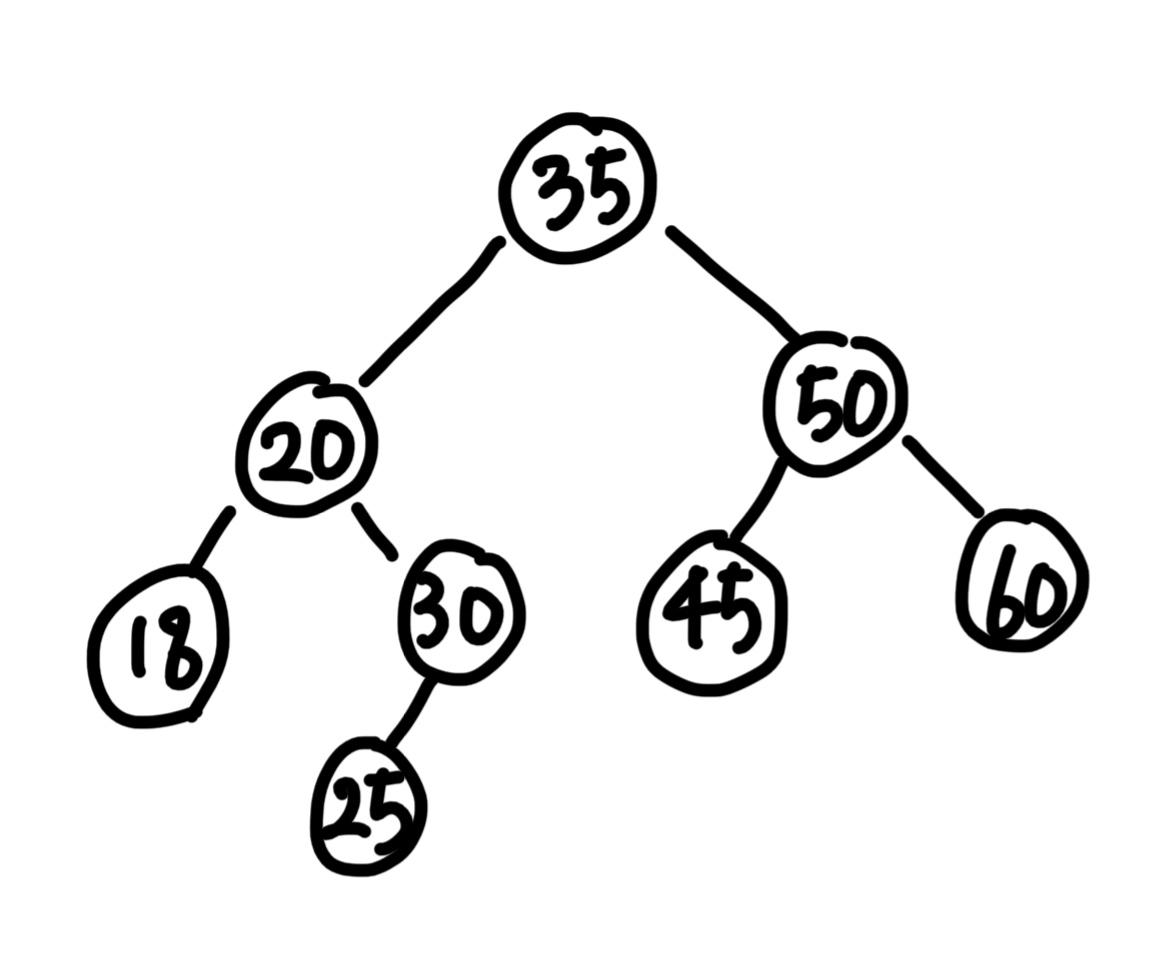
B. 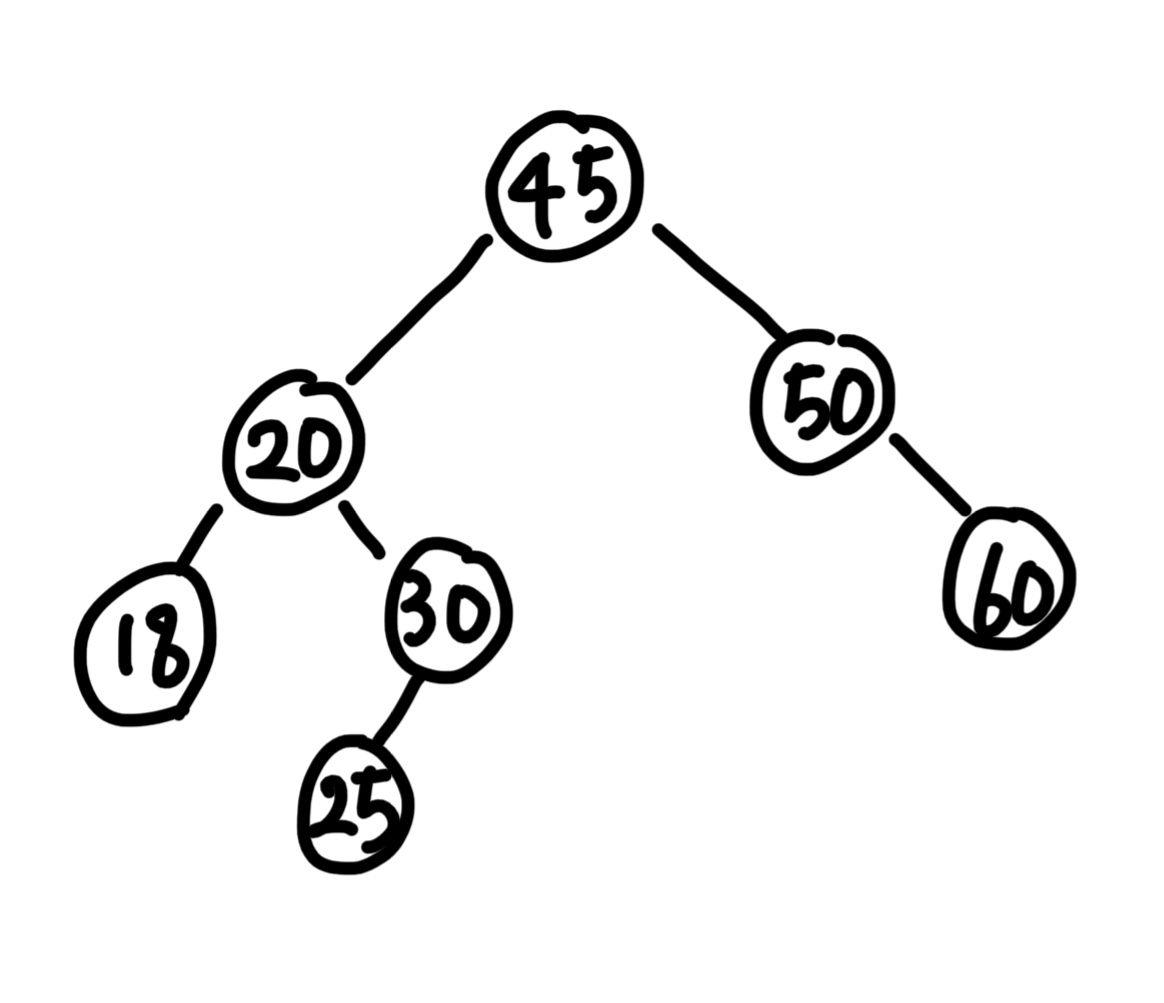
C. 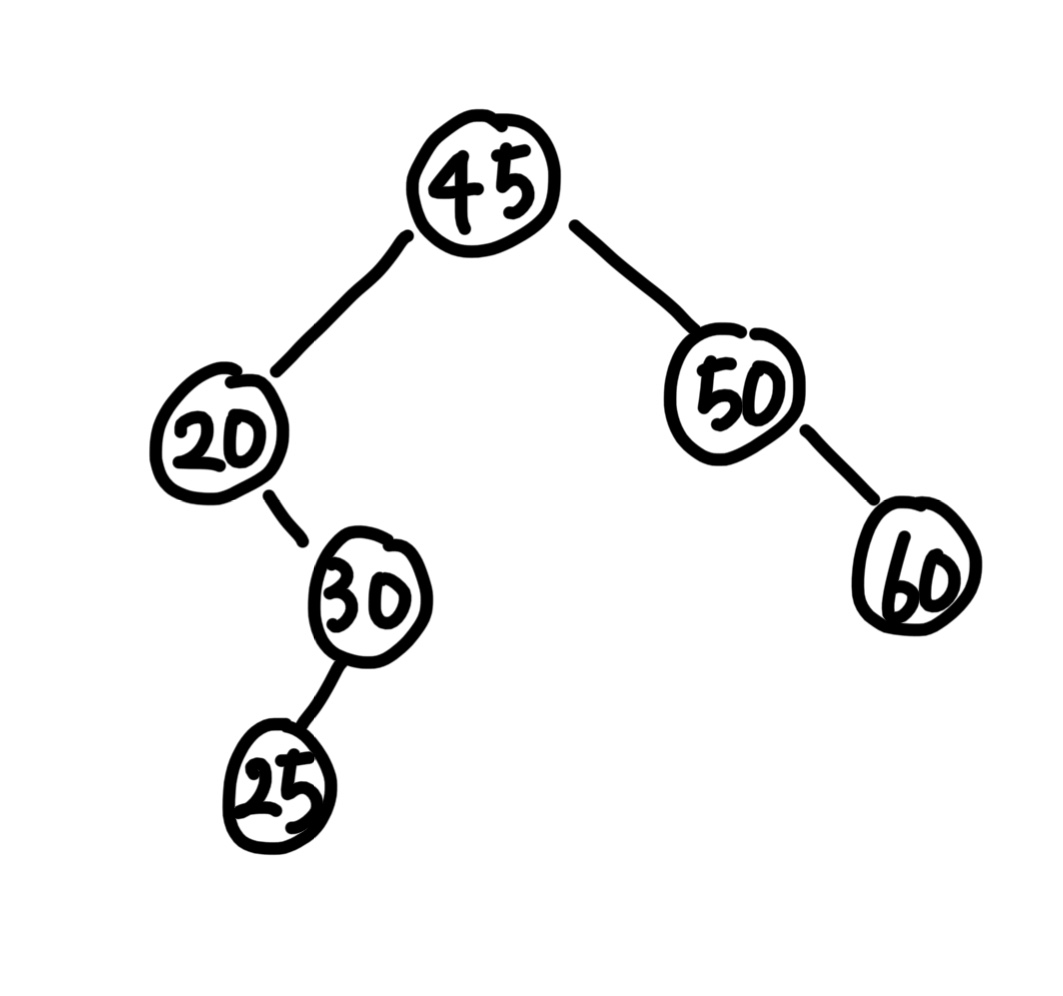
D. after removing 35
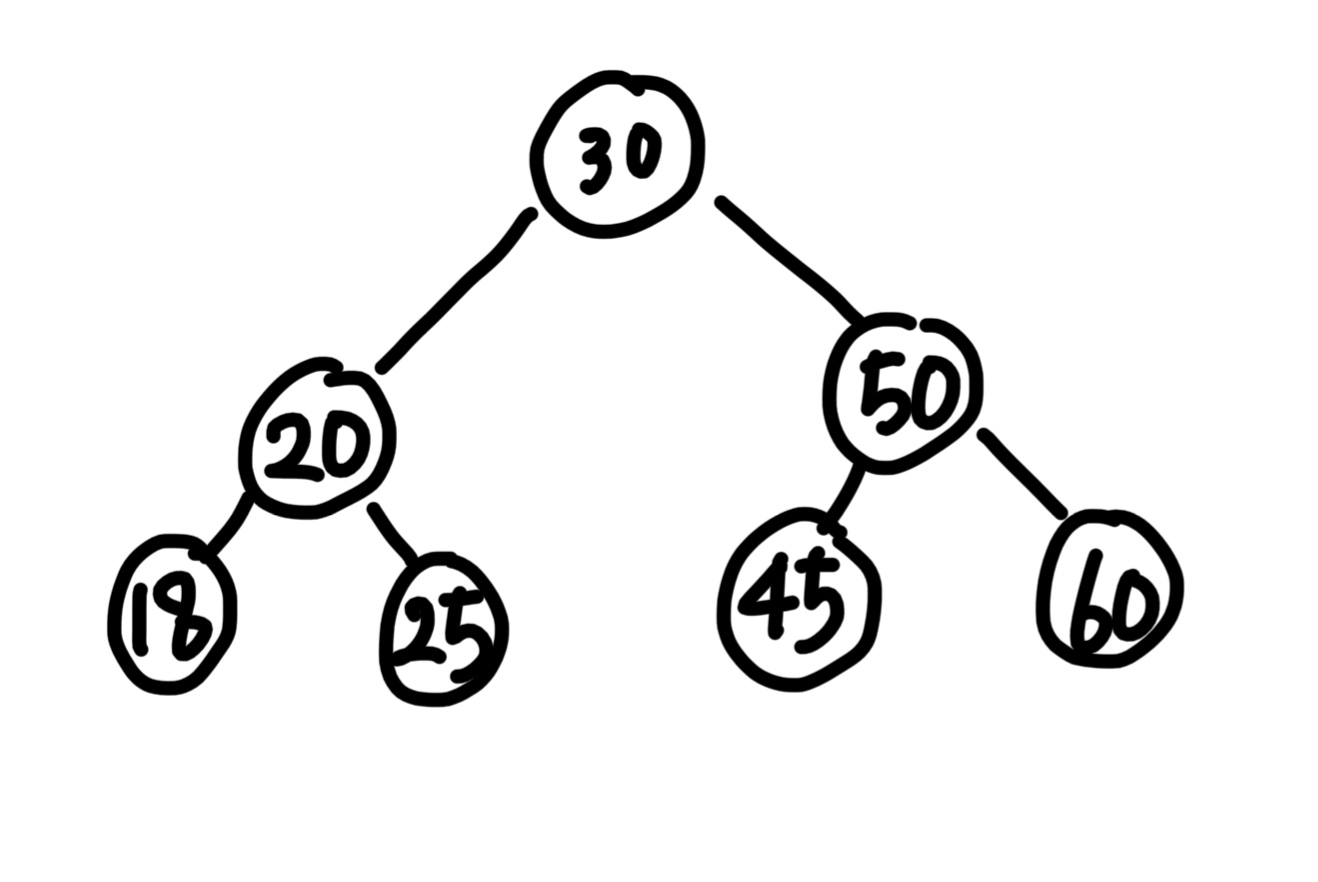
after removing 18
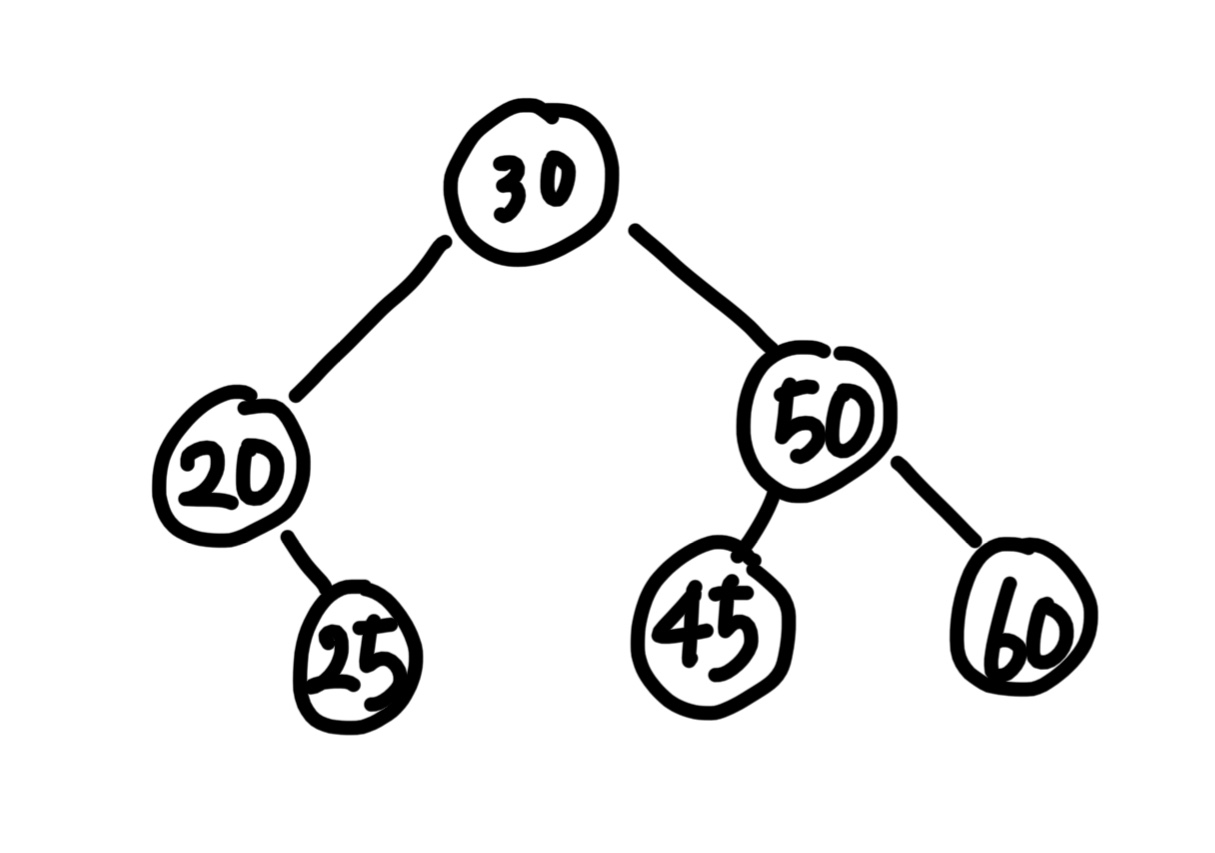

4. (3 pts) Give the function calls of `BinaryTree` class methods (from lecture notes) to build the following tree:

<img src="https://runestone.academy/runestone/books/published/pythonds/_images/exerTree.png" width="540"/>

(image from [https://runestone.academy/runestone/books/published/pythonds/_images/exerTree.png])

In [2]:
# class for each node in Binary Search Tree
class BSTNode:
    def __init__(self, data, left_child = None, right_child = None, parent = None):
        self.data = data
        self.left_child = left_child
        self.right_child = right_child
        self.parent = parent

class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0
    def put(self, data):
        if self.root is None:
            self.root = BSTNode(data)
            self.size += 1
        else:
            self._put(data, self.root)
    def _put(self, data, curr_node):
        if data == curr_node.data:
            return
        if data < curr_node.data:
            if curr_node.left_child is None:
                curr_node.left_child = BSTNode(data, parent = curr_node)
                self.size += 1
            else:
                self._put(data, curr_node.left_child)
        else:
            if curr_node.right_child is None:
                curr_node.right_child = BSTNode(data, parent = curr_node)
                self.size += 1
            else:
                self._put(data, curr_node.right_child)

    def pre_order_traversal(self):
        if self.root is None:
            print("Empty Tree")
        else:
            self.pre_order_traversal_helper(self.root)
            print()

    def pre_order_traversal_helper(self, node):
        if node is None:
            return
        print(node.data, end = " ")
        self.pre_order_traversal_helper(node.left_child)
        self.pre_order_traversal_helper(node.right_child)


myTree = BinarySearchTree()

myTree.put("language")
myTree.put("complied")
myTree.put("interpreted")
myTree.put("C")
myTree.put("Java")
myTree.put("python")
myTree.put("scheme")

myTree.pre_order_traversal()

language complied C Java interpreted python scheme 


### Implementation Question (12 pts)

Implement a Binary Search Tree data structure using the code provided in the lecture. Update the implementation as described below:
* (12 pts) Add `post_order_traversal()` and `in_order_traversal()` methods to print the `data`in post-order and in-order respectively.

Test your implementation using the following sequence of code:

In [ ]:
# Test code for post-order and in-order traversal methods
myTree.put(122)
myTree.put(131)
myTree.put(115)
myTree.put(215)
myTree.put(121)
myTree.put(132)

myTree.post_order_traversal()
myTree.in_order_traversal()

Here is the expected print output for post_order_travesal() method (use of comma is optiona):

<i>121, 115, 132, 215, 131, 122</i>


Here is the expected print output for in_order_traversal() method (use of comma is optional):

<i>115, 121, 122, 131, 132, 215</i>

In [1]:
# class for each node in Binary Search Tree
class BSTNode:
    def __init__(self, data, left_child = None, right_child = None, parent = None):
        self.data = data
        self.left_child = left_child
        self.right_child = right_child
        self.parent = parent

# class for Binary Search Tree
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0
    
    # data insertion
    def put(self, data):
        # if there is no data in Binary Search Tree, make the data as root
        if self.root is None:
            self.root = BSTNode(data)
            self.size += 1
        else:
            self._put(data, self.root)
            
    # data insertion (when there is at least 1 data exist already)
    def _put(self, data, curr_node):
        # if there is the same data that the user wanted to insert just return (do not have duplicated data)
        if data == curr_node.data:
            return
        # if the data is less than the current node
        if data < curr_node.data:
            # if there is no left child on the current node, insert it
            if curr_node.left_child is None:
                curr_node.left_child = BSTNode(data, parent = curr_node)
                self.size += 1
            # if there is a left child on the current node, keep track of the tree
            else:
                self._put(data, curr_node.left_child)
        # if the data is greater than the current node
        else:
            # if there is no right child on the current node, insert it
            if curr_node.right_child is None:
                curr_node.right_child = BSTNode(data, parent = curr_node)
                self.size += 1
            # if there is a right child on the current node, keep track of the tree
            else:
                self._put(data, curr_node.right_child)
    
    # post order traversal method
    # print the data when going back to parent node
    def post_order_traversal(self):
        if self.root is None:
            print("Empty Tree")
        else:
            self.post_order_traversal_helper(self.root)
            print()
    
    def post_order_traversal_helper(self, node):
        if node is None:
            return
        # go the left child, right child recursively and finally print the data
        self.post_order_traversal_helper(node.left_child)
        self.post_order_traversal_helper(node.right_child)
        print(node.data, end = " ")
    
    # in order traversal method
    # print the left child, self, and right child data in order
    def in_order_traversal(self):
        if self.root is None:
            print("Empty Tree")
        else:
            self.in_order_traversal_helper(self.root)
            print()
    
    def in_order_traversal_helper(self, node):
        if node is None:
            return
        # go the left child, print the self data, and go to right child
        self.in_order_traversal_helper(node.left_child)
        print(node.data, end = " ")
        self.in_order_traversal_helper(node.right_child)
        
# test code
myTree = BinarySearchTree()

myTree.put(122)
myTree.put(131)
myTree.put(115)
myTree.put(215)
myTree.put(121)
myTree.put(132)

myTree.post_order_traversal()
myTree.in_order_traversal()

121 115 132 215 131 122 
115 121 122 131 132 215 


## Submitting Assignments
1.	Use Canvas to submit your assignment. You must upload your solutions as `<your last name>_ma5.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file and a .html file representing your Notebook as a webpage (File->Download as->HTML).

## Grading Guidelines
This assignment is worth 50 points. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 35 pts for correct answers to the conception questions
* 12 pts for correct implementation of Binary Search Tree `post_order_traversal()` and `in_order_traversal()` methods
* 3 pts for for adherence to proper programming style and comments established for the class